In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import chardet
with open('global_terrorist.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
df = pd.read_csv('global_terrorist.csv', encoding = 'ISO-8859-1', low_memory=False)

In [4]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [5]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df.shape

(181691, 135)

In [9]:
# Dropping columns that are mostly empty (more that 50%)
for column in df:
    if(df[column].isna().sum() > 90000):
        df.drop(column, axis = 1, inplace=True)

In [10]:
df.shape

(181691, 58)

In [11]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


In [12]:
# Removing the redundant and unimportant columns 
df.drop(['eventid', 'extended', 'country', 'region', 'latitude', 'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 
         'crit2', 'crit3', 'doubtterr', 'attacktype1','targtype1', 'natlty1', 'targsubtype1', 'corp1', 'individual', 'claimed', 
         'weaptype1', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte', 'nperps', 
         'nperpcap', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'], 
        axis = 1, inplace=True)

In [13]:
df.shape

(181691, 20)

In [14]:
print(df.columns.tolist())

['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'multiple', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1', 'natlty1_txt', 'gname', 'guncertain1', 'weaptype1_txt', 'nkill', 'nwound']


In [15]:
columns = ['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City', 'Multiple', 'Success', 'Suicide', 'Attack_Type', 
           'Target_Type', 'Target_Sub_Type', 'Target', 'Nationality', 'Gang_Name', 'Gun_Certanity', 'Weapon_Type', 
           'No_of_kills', 'No_of_wounded']

In [16]:
df.columns = columns
print(df.columns.tolist())

['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City', 'Multiple', 'Success', 'Suicide', 'Attack_Type', 'Target_Type', 'Target_Sub_Type', 'Target', 'Nationality', 'Gang_Name', 'Gun_Certanity', 'Weapon_Type', 'No_of_kills', 'No_of_wounded']


In [17]:
df['Casuality']=df['No_of_kills']+df['No_of_wounded']

In [18]:
df.isna().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
Multiple               1
Success                0
Suicide                0
Attack_Type            0
Target_Type            0
Target_Sub_Type    10373
Target               636
Nationality         1559
Gang_Name              0
Gun_Certanity        380
Weapon_Type            0
No_of_kills        10313
No_of_wounded      16311
Casuality          16874
dtype: int64

In [19]:
# df.dropna(axis = 0, inplace = True)
df.shape

(181691, 21)

## Data Visualization

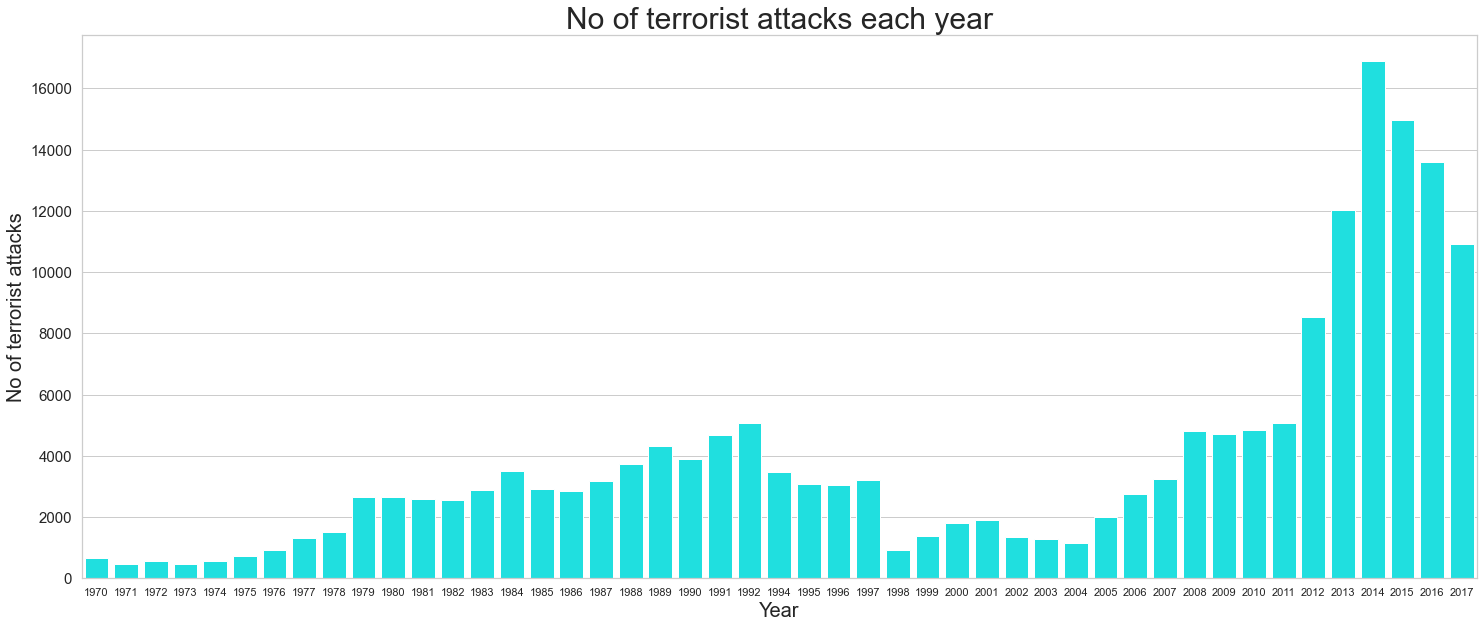

In [20]:
plt.figure(figsize=(25,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='Year', color='cyan')
plt.ylabel('No of terrorist attacks', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.title('No of terrorist attacks each year', fontsize=30)
plt.show()

#### Observations:
From this graph we can see that there has been a steady rise in terrorist activities since 2004 till 2014, which is also the year with highest number of terrorist activities, then the terrorist activities have started to decline.

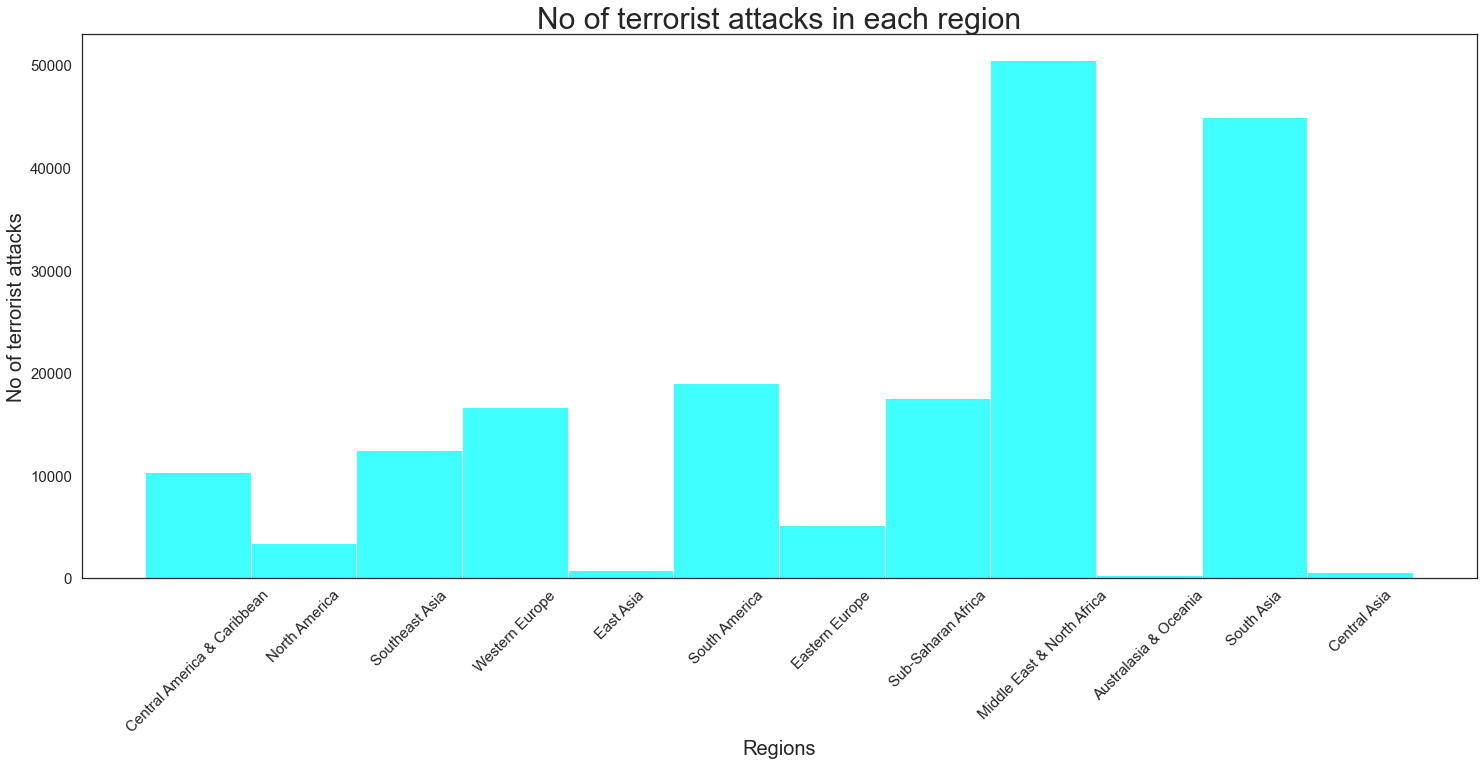

In [21]:
plt.figure(figsize=(25,10))
sns.set_theme(style="white")
sns.histplot(data=df, x='Region', color='cyan')
plt.ylabel('No of terrorist attacks', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Regions', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.title('No of terrorist attacks in each region', fontsize=30)
plt.show()

#### Observations:
We see that Middle East & North Africa are region with highest number of terrorist attacks closely followed by South Asia.
Meanwhile, Australasia & Oceania, East and Central Asia are one of the most safest regions.

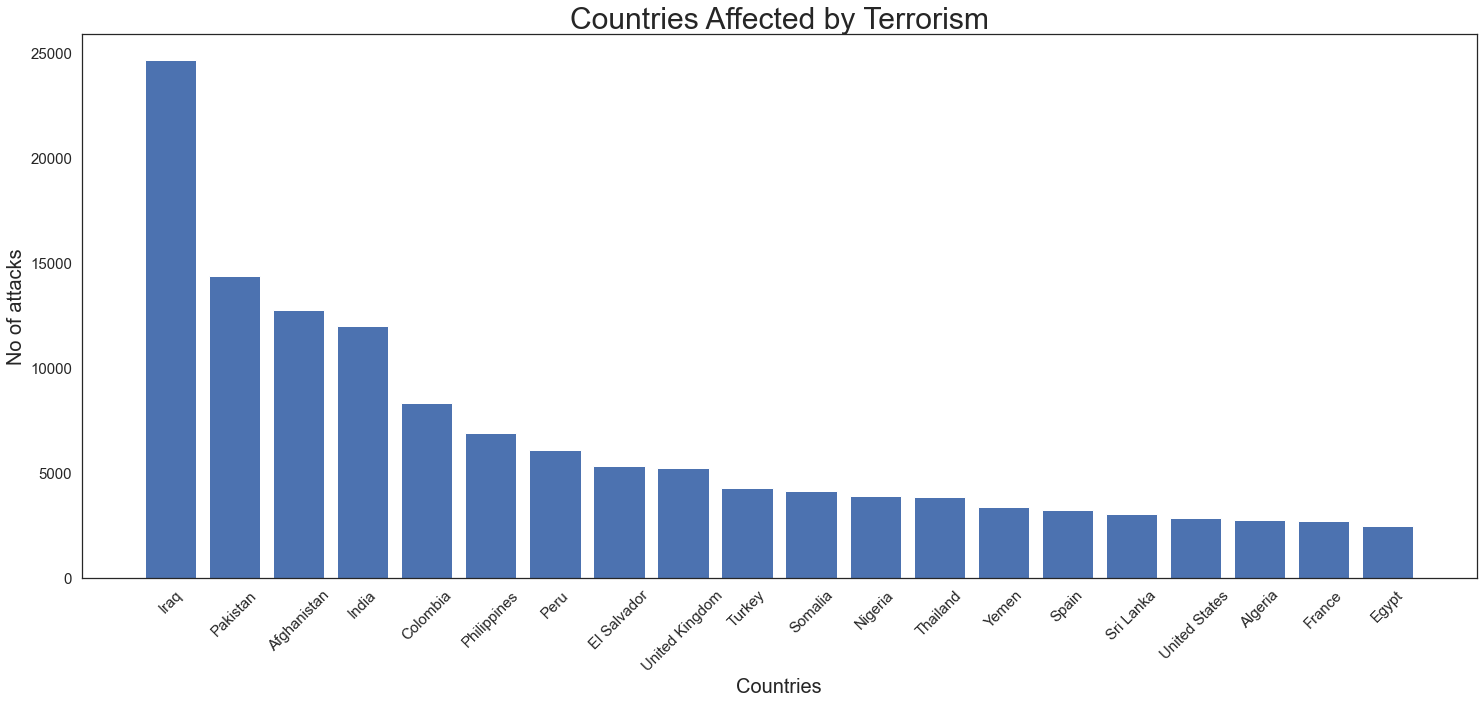

In [22]:
plt.figure(figsize=(25,10))
sns.set_theme(style="white")
plt.bar(df['Country'].value_counts()[:20].index, df['Country'].value_counts()[:20])
plt.ylabel('No of attacks', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Countries', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.title('Countries Affected by Terrorism', fontsize=30)
plt.show()

#### Obsesrvation:
We see that Iraq has had the highest number of attacks followed by Pakistan, Afghanistan and India.

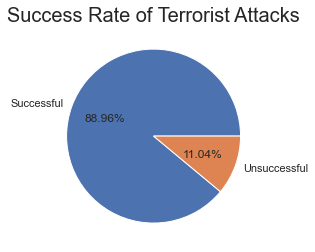

In [23]:
plt.pie(df['Success'].value_counts(), labels=['Successful', 'Unsuccessful'], autopct='%1.2f%%')
plt.title('Success Rate of Terrorist Attacks', fontsize=20)
plt.show()

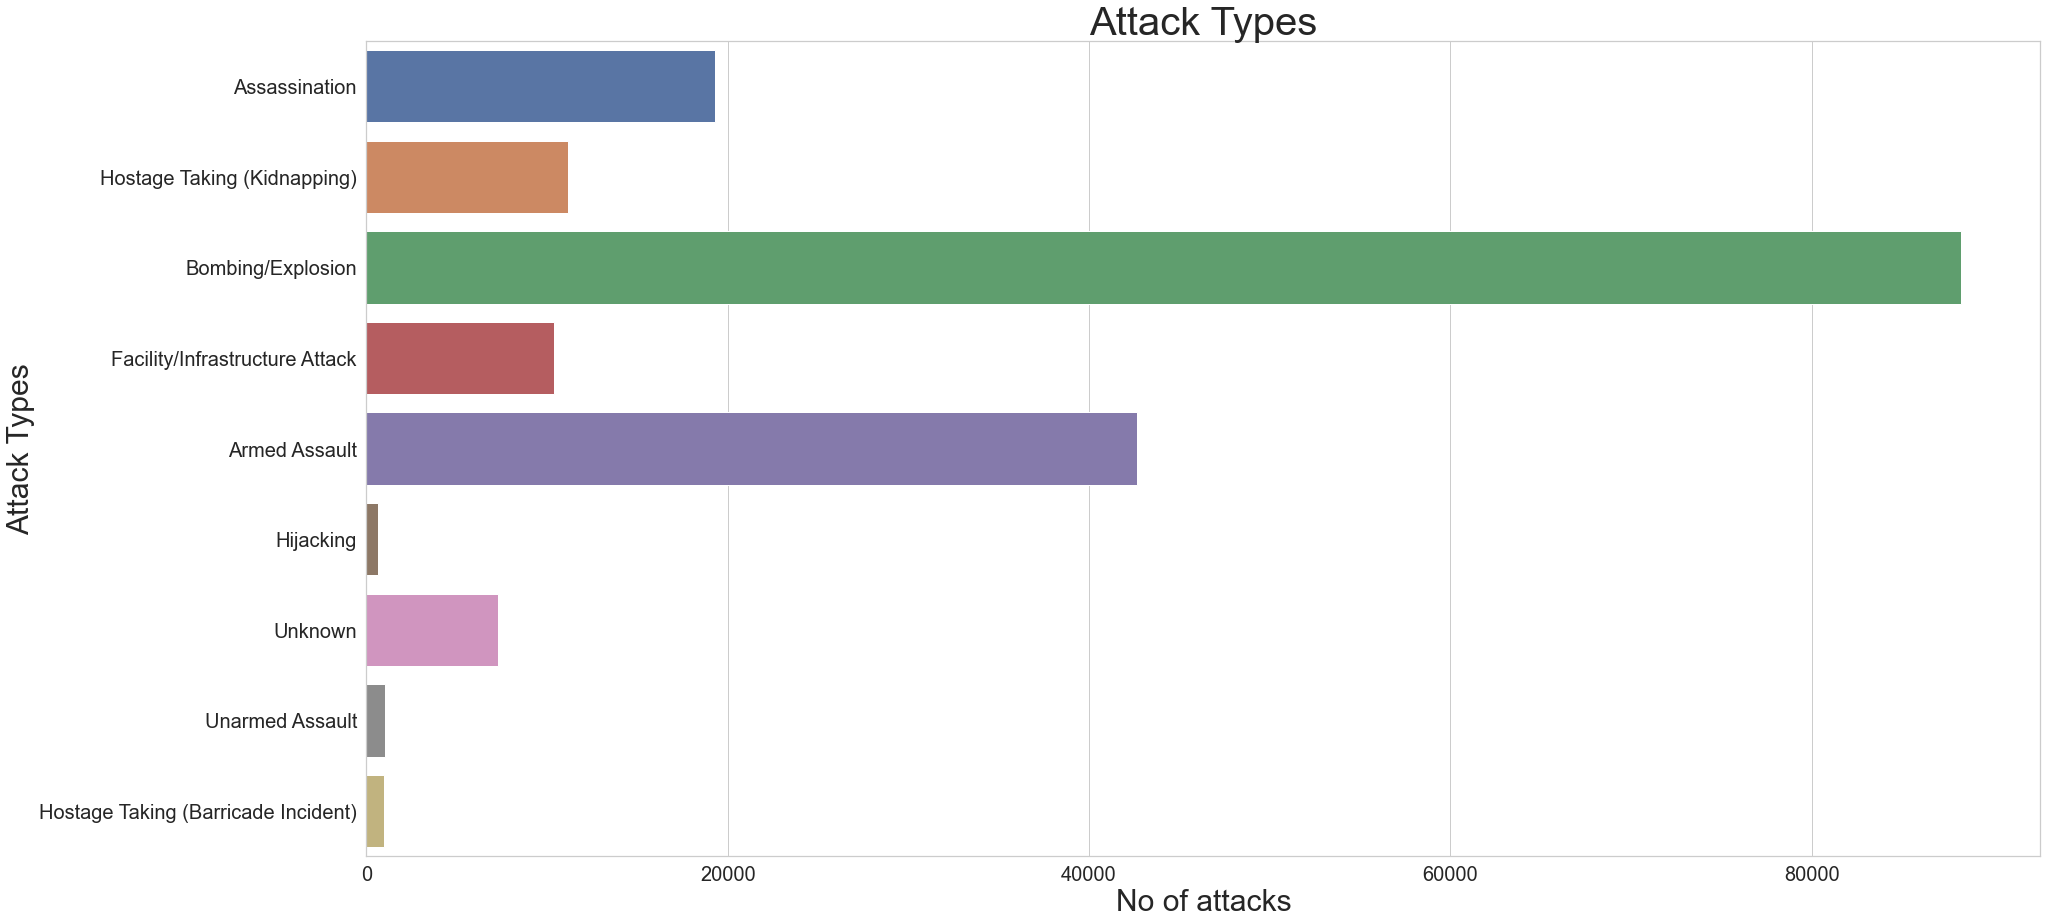

In [24]:
plt.figure(figsize=(30,15))
sns.set_theme(style="whitegrid")
sns.countplot(data=df, y='Attack_Type')
plt.ylabel('Attack Types', fontsize=30)
plt.yticks(fontsize=20)
plt.xlabel('No of attacks', fontsize=30)
plt.xticks(fontsize=20)
plt.title('Attack Types', fontsize=40)
plt.show()

#### Obsesrvation:
Bombing and armer assault are the most prefered method of attacking 

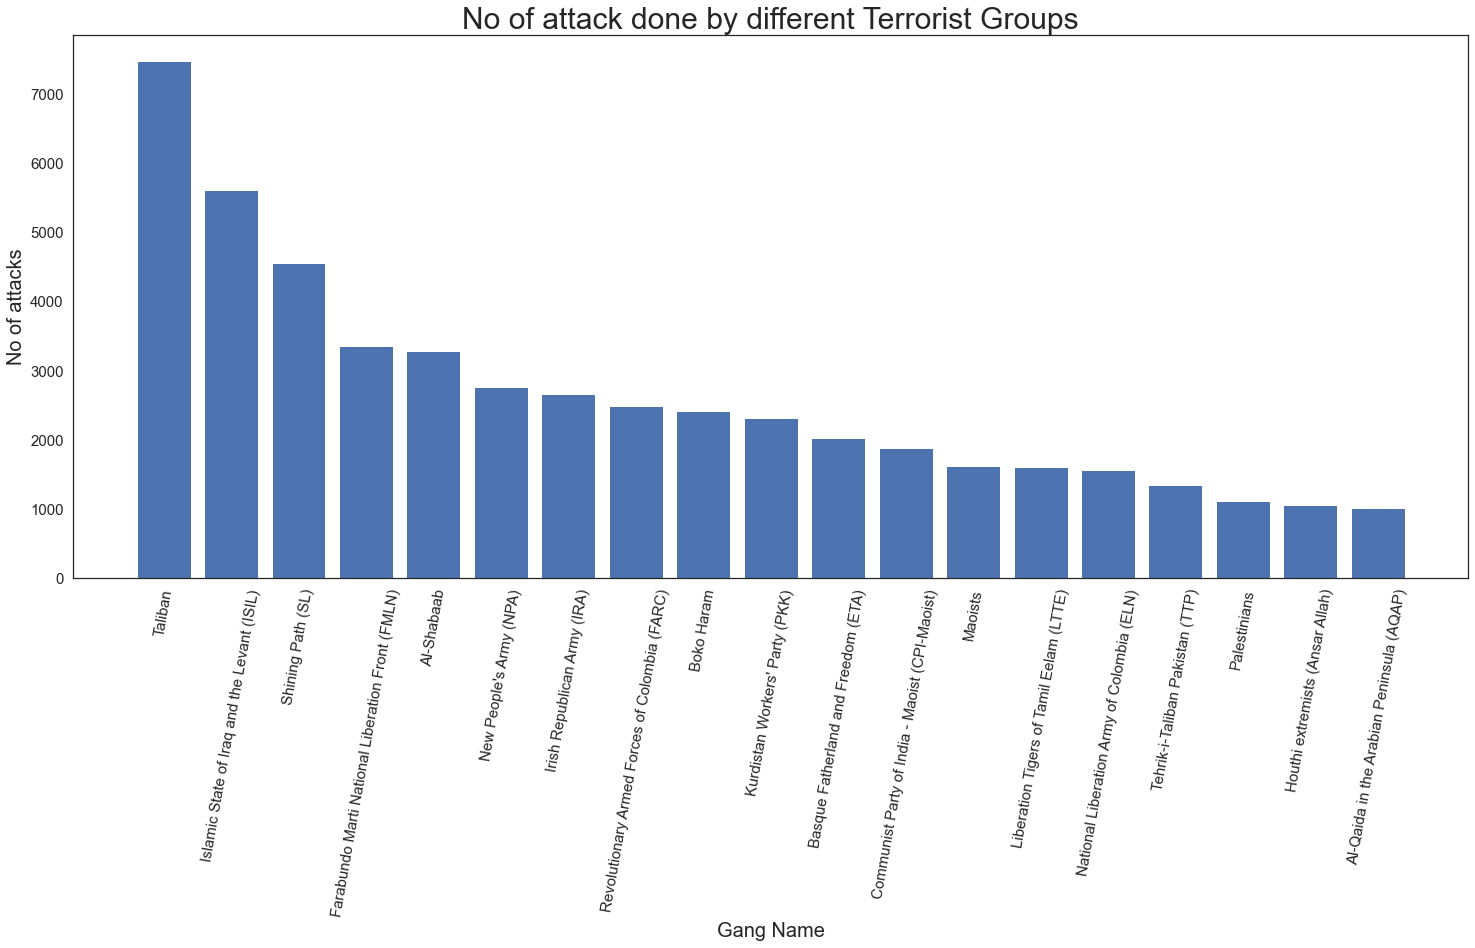

In [25]:
plt.figure(figsize=(25,10))
sns.set_theme(style="white")
plt.bar(df['Gang_Name'].value_counts()[1:20].index, df['Gang_Name'].value_counts()[1:20], )
plt.xlabel('Gang Name', fontsize=20)
plt.xticks(rotation=80, fontsize=15)
plt.ylabel('No of attacks', fontsize=20)
plt.yticks(fontsize=15)
plt.title('No of attack done by different Terrorist Groups', fontsize=30)
plt.show()

#### Obsesrvation:
Taliban is the most active terrorist group followed by ISIL and Shinging Path

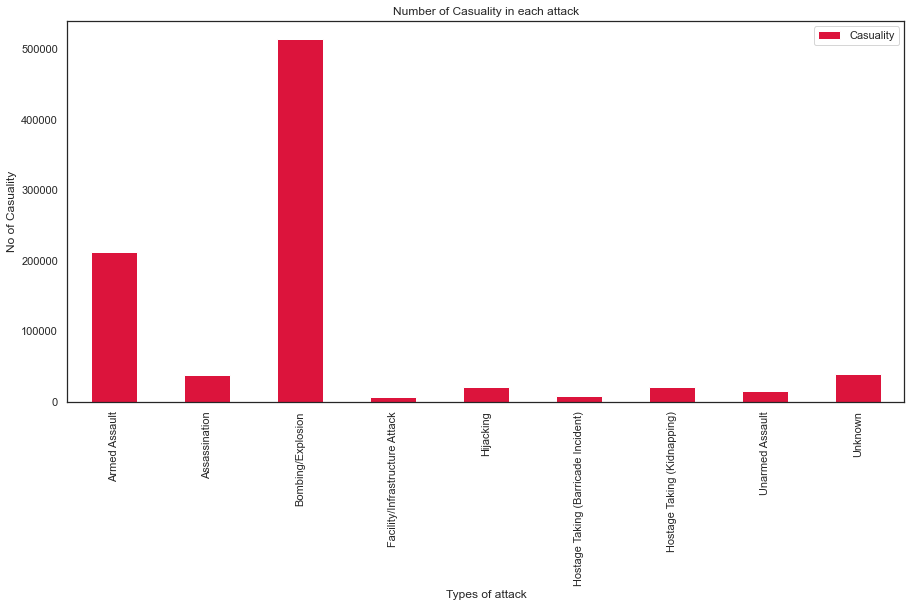

In [26]:
df[['Attack_Type','Casuality']].groupby(["Attack_Type"],axis=0).sum().plot.bar(figsize = (15,7),color = 'Crimson')
plt.title('Number of Casuality in each attack')
plt.xlabel('Types of attack')
plt.ylabel('No of Casuality')
plt.show()

#### Observaion:
Bombing attacks have seen the highest number of casulaties, more than rest of the attacks combined